In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

Read in dataset from Cleaning Process

In [9]:
csv_path_dog_show = '..\\Data\\best_in_show_cleaned.csv'
csv_path_dog_traits = '..\\Data\\dog_breeds_traits_cleaned.csv'
csv_path_dog_traits_og = '..\\Data\\dog_breeds_traits.csv'

In [10]:
df_show = pd.read_csv(csv_path_dog_show)

In [8]:
df_traits = pd.read_csv(csv_path_dog_traits)
df_traits_og = pd.read_csv(csv_path_dog_traits_og)

In [67]:
df_traits['Height (in)'] = df_traits_og['Height (in)']

In [68]:
df_traits.head()

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),calm,charming,patient,kind,...,health_hereditary myopathy,health_diabetes,health_respiratory issues,health_hip dysplasia,health_bladder stones,health_breathing problems,health_ear infections,health_obesity,health_dental problems,health_elbow dysplasia
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,12-Oct,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,10-Jul,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,Bulldog,England,"White, Red",12-16,Brown,10-Aug,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",15-Dec,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,15-Dec,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [12]:
os.getcwd()

'D:\\doggo-data\\Notebooks'

In [49]:
df_show.head()

,dog_breed,category,datadog_score,popularity_in_us,lifetime_cost_usd,intelligence_trainability_ranking,intelligence_trainability_percent,longevity_years,longevity_percent,num_genetic_ailments,...,food_yearly_usd,food_lifetime_usd,other_costs_total_usd,total_yearly_usd,total_yearly_gbp,treats_enrichment_yearly_gpb,pet_sitters_yearly_gbp,grooming_yearly_gbp,vet_fees_yearly_gbp,startup_costs
0,Border Collie,herding,3.64,45,20143.0,1,1.00,12.52,0.79,2,...,278.0,3486,13095,1046,784,121,126,244,177,200
1,Border Terrier,terrier,3.61,80,22638.0,30,0.70,14.00,0.98,0,...,278.0,3898,14643,1046,784,121,126,244,177,200
2,Brittany,sporting,3.54,30,22589.0,19,0.80,12.92,0.89,0,...,400.0,5171,13514,1046,784,121,126,244,177,200
3,Cairn Terrier,terrier,3.53,59,21992.0,35,0.61,13.84,0.95,2,...,278.0,3854,14476,1046,784,121,126,244,177,200
4,Welsh Springer Spaniel,sporting,3.34,130,20224.0,31,0.69,12.49,0.77,1,...,278.0,3478,13064,1046,784,121,126,244,177,200


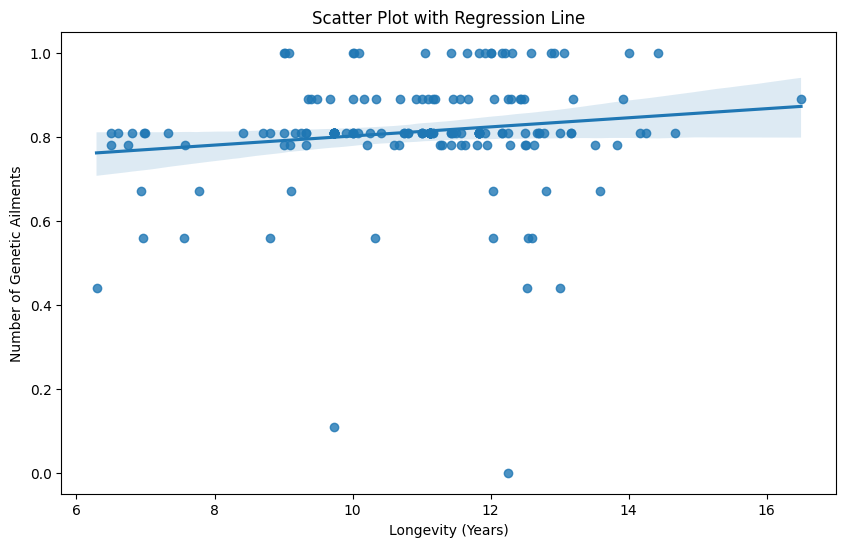

In [114]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.regplot(x='longevity_years', y='genetic_ailments_percent', data=df_show)
plt.title('Scatter Plot with Regression Line')
plt.ylabel('Percent of Genetic Ailments')
plt.xlabel('Longevity (Years)')
plt.show()

In [115]:
X = sm.add_constant(df_show[['longevity_years']])
y = df_show['genetic_ailments_percent']

model = sm.OLS(y, X).fit()
print(model.summary())
warnings.filterwarnings("ignore", category=RuntimeWarning)

                               OLS Regression Results                               
Dep. Variable:     genetic_ailments_percent   R-squared:                       0.021
Model:                                  OLS   Adj. R-squared:                  0.016
Method:                       Least Squares   F-statistic:                     3.696
Date:                      Sun, 28 Jan 2024   Prob (F-statistic):             0.0562
Time:                              23:01:38   Log-Likelihood:                 103.58
No. Observations:                       172   AIC:                            -203.2
Df Residuals:                           170   BIC:                            -196.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [60]:
missing_values = df_show['longevity_years'].isna()

# Print the result
print(missing_values)

0      False
1      False
2      False
3      False
4      False
       ...  
167    False
168    False
169    False
170    False
171    False
Name: longevity_years, Length: 172, dtype: bool


In [54]:
df_show['genetic_ailments_percent']

0      0.78
1      1.00
2      1.00
3      0.78
4      0.89
       ... 
167    0.81
168    0.81
169    0.81
170    0.81
171    0.81
Name: genetic_ailments_percent, Length: 172, dtype: float64

In [52]:
df_show['genetic_ailments_percent'].mean()

0.8135632183908046

In [53]:
#fill NAs for regression model to rectify divide by 0 error
df_show['genetic_ailments_percent'].fillna(0.81, inplace=True)

In [121]:
#Save Dataframe working copy
df_show.to_csv('../Data/best_in_show_cleaned.csv', index=False)

In [59]:
df_show['longevity_years']

0      12.52
1      14.00
2      12.92
3      13.84
4      12.49
       ...  
167     9.73
168    11.84
169    13.17
170     8.80
171    11.13
Name: longevity_years, Length: 172, dtype: float64

Regression Model for Size & Ailments

In [69]:
# Split the 'Height (in)' column into low and high end
df_traits[['low_height', 'high_height']] = df_traits['Height (in)'].str.split('-', expand=True)

# Convert the 'low_height' and 'high_height' columns to numeric type
df_traits[['low_height', 'high_height']] = df_traits[['low_height', 'high_height']].apply(pd.to_numeric)

# Calculate the average height and create a new column
df_traits['average_height'] = (df_traits['low_height'] + df_traits['high_height']) / 2

In [70]:
df_traits.head()

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),calm,charming,patient,kind,...,health_hip dysplasia,health_bladder stones,health_breathing problems,health_ear infections,health_obesity,health_dental problems,health_elbow dysplasia,low_height,high_height,average_height
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,12-Oct,0,0,0,0,...,1,0,0,1,1,0,0,21,24,22.5
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,10-Jul,0,0,0,0,...,1,0,0,0,0,0,1,22,26,24.0
2,Bulldog,England,"White, Red",12-16,Brown,10-Aug,1,0,0,0,...,0,0,0,0,1,0,0,12,16,14.0
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",15-Dec,0,0,0,0,...,1,1,0,0,0,0,0,10,15,12.5
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,15-Dec,0,0,0,0,...,1,0,0,1,0,0,0,13,15,14.0


In [124]:
#Save Dataframe working copy
df_traits.to_csv('../Data/dog_breeds_traits_cleaned.csv')

In [79]:
df_traits['ailment_count'] = df_traits.iloc[:, 30:-4].sum(axis=1)  # Exclude the last 3 columns from the calculation

In [80]:
df_traits.head()

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),calm,charming,patient,kind,...,health_bladder stones,health_breathing problems,health_ear infections,health_obesity,health_dental problems,health_elbow dysplasia,low_height,high_height,average_height,ailment_count
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,12-Oct,0,0,0,0,...,0,0,1,1,0,0,21,24,22.5,3
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,10-Jul,0,0,0,0,...,0,0,0,0,0,1,22,26,24.0,3
2,Bulldog,England,"White, Red",12-16,Brown,10-Aug,1,0,0,0,...,0,0,0,1,0,0,12,16,14.0,3
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",15-Dec,0,0,0,0,...,1,0,0,0,0,0,10,15,12.5,3
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,15-Dec,0,0,0,0,...,0,0,1,0,0,0,13,15,14.0,3


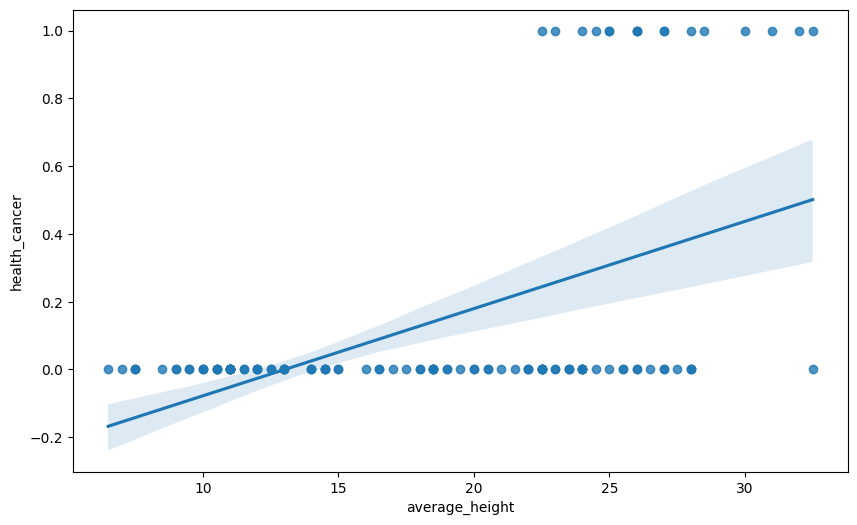

In [119]:
# Create a scatterplot with regression line and OLS model
plt.figure(figsize=(10, 6)) 
sns.regplot(x='average_height', y='health_cancer', data=df_traits)
# Show the plot
plt.show()

In [11]:
X = sm.add_constant(df_traits[['average_height']])
y = df_traits['health_cancer']

model = sm.OLS(y, X).fit()
print(model.summary())
warnings.filterwarnings("ignore", category=RuntimeWarning)

                            OLS Regression Results                            
Dep. Variable:          health_cancer   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     38.12
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.03e-08
Time:                        22:51:46   Log-Likelihood:                -27.240
No. Observations:                 117   AIC:                             58.48
Df Residuals:                     115   BIC:                             64.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3354      0.083     -4.

In [93]:
# Assuming df is your DataFrame

# Check for blanks (empty strings) in 'average_height'
blanks_in_average_height = df_traits['ailment_count'].astype(str).str.strip().eq('').any()

# Check for zeros in 'average_height'
zeros_in_average_height = (df_traits['ailment_count'] == 0).any()

# Print the results
print(f"Blanks in 'average_height': {blanks_in_average_height}")
print(f"Zeros in 'average_height': {zeros_in_average_height}")

Blanks in 'average_height': False
Zeros in 'average_height': False


In [98]:
zeros_in_average_height = df_traits['average_height'].isna().any()

In [120]:
print(zeros_in_average_height)

False


In [123]:
df_traits.set_index(df_traits.columns[0], inplace=True)

As linear regression was not a suitable method for health_cancer as it was boolean. I will attempt logistic regression technique:

Optimization terminated successfully.
         Current function value: 0.251246
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          health_cancer   No. Observations:                  117
Model:                          Logit   Df Residuals:                      115
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 Jan 2024   Pseudo R-squ.:                  0.3938
Time:                        22:56:28   Log-Likelihood:                -29.396
converged:                       True   LL-Null:                       -48.493
Covariance Type:            nonrobust   LLR p-value:                 6.406e-10
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.1180      2.668     -4.167      0.000     -16.348      -5.888
average_height   

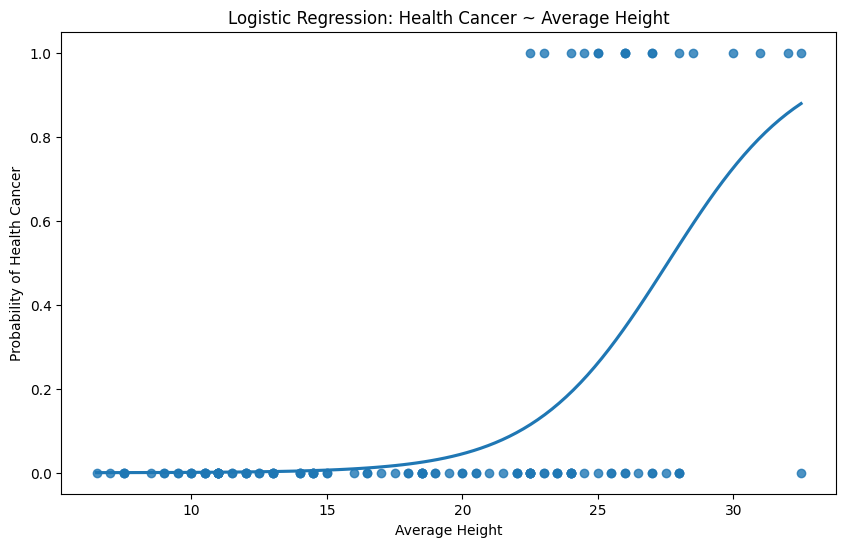

In [12]:
# Add a constant term for the intercept
df_traits['const'] = 1

# Define the independent variable (X) and the dependent variable (y)
X = df_traits[['const', 'average_height']]
y = df_traits['health_cancer']

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display summary
print(result.summary())

# Create a scatterplot with logistic regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='average_height', y='health_cancer', data=df_traits, logistic=True, ci=None)
plt.title('Logistic Regression: Health Cancer ~ Average Height')
plt.xlabel('Average Height')
plt.ylabel('Probability of Health Cancer')
plt.show()